### esg score 산출 ver2. : 자연로그로 esg_score 정규화 시키기 
- 2023/01/12
- 기업 및 연도별 esg_score를 자연로그 취한 문서수로 나눠서 활용
- 기업별 문서 수에 따른 영향력 감소시키기 위함

In [2]:
# esg_score sum 한 데이터 
import pandas as pd
sum_score=pd.read_excel('./scoring_공유/scoring_neg_minus_koelectra_cmp_year_2301111.xlsx')
sum_score


,id,year,ecnt,scnt,gcnt,predicted,tot_esg_cnt,e_score,s_score,g_score,esg_score
0,1,2020,1,5,9,10,15,0.5,-0.071429,-1.428571,-1
1,1,2021,0,12,12,2,24,0.0,-2.000000,-1.000000,-3
2,2,2020,3,10,12,7,25,0.0,-0.750000,0.750000,0
3,2,2021,0,4,10,9,14,0.0,-1.000000,3.000000,2
4,3,2020,0,11,26,13,37,0.0,3.666667,7.333333,11
...,...,...,...,...,...,...,...,...,...,...,...
2551,1380,2021,0,0,1,0,1,0.0,0.000000,-1.000000,-1
2552,1381,2020,0,1,3,3,4,0.0,0.500000,2.500000,3
2553,1381,2021,0,3,2,0,5,0.0,0.166667,-0.166667,0
2554,1382,2020,0,1,6,0,7,0.0,0.500000,-0.500000,0


(array([  3.,  30.,  57., 110., 184., 269., 486., 561., 327., 203., 123.,
         85.,  59.,  27.,  15.,   9.,   4.,   1.,   2.,   1.]),
 array([-28.  , -24.05, -20.1 , -16.15, -12.2 ,  -8.25,  -4.3 ,  -0.35,
          3.6 ,   7.55,  11.5 ,  15.45,  19.4 ,  23.35,  27.3 ,  31.25,
         35.2 ,  39.15,  43.1 ,  47.05,  51.  ]),
 <BarContainer object of 20 artists>)

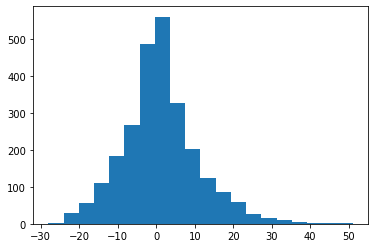

In [3]:
# esg_score 분포확인
import matplotlib.pyplot as plt
plt.hist(sum_score['esg_score'], bins = 20)

In [4]:
# 회사별 doc수 결합
# 문서별 scoring 파일 가져오기
data=pd.read_excel('./scoring_공유/scored_koelectra_neg_minus1_2301111.xlsx')
data

,id,year,doc,content,ecnt,scnt,gcnt,predicted,tot_esg_cnt,e_score,s_score,g_score,esg_score
0,1,2020,원수가 다니겠다고 하면 도시락 싸 들고 환영할 회사 중소기업의 흔한 사건사고 단점 ...,장점 꼰대 문화가 별로 없고 변화와 발전 추구함 투자를 많이 받고 있기 때문에 사...,0,4,3,-1,7,0.0,-0.571429,-0.428571,-1.0
1,1,2020,앞으로도 더 성장 할 가능성이 높은 회사,장점 직원들에게 많은 기회를 준다 한가지만 보지 않고 다양한 분야에서 어떻게 인재가...,0,0,2,1,2,0.0,0.000000,1.000000,1.0
2,1,2020,블리츠웨이 300 꿈의 장난감 볼트론 피규어로 매출 100억원 기대,피규어 전문제작사 블리츠웨이가 출시 예정인 볼트론이 사전예약 첫 날 자체 예약 최고...,0,0,0,1,0,0.0,0.000000,0.000000,0.0
3,1,2020,배용준도 투자한 블리츠웨이 코스닥 예비심사 통과 정밀 피규어 최초 상장 기대,피규어 개발 및 제작 전문 기업 블리츠웨이가 코스닥 상장을 위한 예비 심사를 통과했...,0,0,0,1,0,0.0,0.000000,0.000000,0.0
4,1,2020,대신밸런스제9호스팩 블리츠웨이와 합병 승인 12월 코스닥 상장,대신밸런스제9호스팩은 피규어 개발 제작 전문 기업 블리츠웨이 와 합병상장을 위한 ...,0,0,0,1,0,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71810,1382,2020,레미콘제조업체로 현상유지만 하고있음앞으로 전망은 낙관적이지 않음,장점 공장은 장점 이 없고 서울본사는 근무할만 함빽있는 사람은 다닐만함 단점 빽없는...,0,0,3,-1,3,0.0,0.000000,-1.000000,-1.0
71811,1382,2020,개 법인이 같이 운영되고 있음 그중 개는 죽쑤는중 덕원이랑 모헨즈가 이끌어감 덕원은...,장점 중소기업치고 연봉이 높은편 대신 성과금이 없다 본사에입사하면 워라밸 가능함 공...,0,0,1,1,1,0.0,0.000000,1.000000,1.0
71812,1382,2021,차산업 특성상 육체노동의 불가피함 진급욕심가득한 몇몇으로 인해 피해보는 직원 속출,장점 직원들 대부분의 성향이 밝은 쪽이 많음 적응하는 기간이 오래걸리지않고 형동생으...,0,1,1,-1,2,0.0,-0.500000,-0.500000,-1.0
71813,1382,2021,사람을 가볍게 여기는 회사 임원진들만 잘먹고 잘사는 회사,장점 월급이 밀리지 않고 제 때 들어오는것이 이 회사의 유일한 장점 단점 정해놓은...,0,0,1,-1,1,0.0,0.000000,-1.000000,-1.0


In [5]:
# 회사 및 연도별 doc 수 
temp=data[['id','year','doc']].groupby(['id','year']).count().reset_index()
temp=temp.rename(columns={'doc': 'doc_cnt'})
temp

,id,year,doc_cnt
0,1,2020,16
1,1,2021,16
2,2,2020,25
3,2,2021,21
4,3,2020,23
...,...,...,...
2551,1380,2021,2
2552,1381,2020,3
2553,1381,2021,2
2554,1382,2020,4


In [6]:
# 회사별 doc수 결합
temp_df=pd.concat([sum_score,temp['doc_cnt']],axis=1)
temp_df


,id,year,ecnt,scnt,gcnt,predicted,tot_esg_cnt,e_score,s_score,g_score,esg_score,doc_cnt
0,1,2020,1,5,9,10,15,0.5,-0.071429,-1.428571,-1,16
1,1,2021,0,12,12,2,24,0.0,-2.000000,-1.000000,-3,16
2,2,2020,3,10,12,7,25,0.0,-0.750000,0.750000,0,25
3,2,2021,0,4,10,9,14,0.0,-1.000000,3.000000,2,21
4,3,2020,0,11,26,13,37,0.0,3.666667,7.333333,11,23
...,...,...,...,...,...,...,...,...,...,...,...,...
2551,1380,2021,0,0,1,0,1,0.0,0.000000,-1.000000,-1,2
2552,1381,2020,0,1,3,3,4,0.0,0.500000,2.500000,3,3
2553,1381,2021,0,3,2,0,5,0.0,0.166667,-0.166667,0,2
2554,1382,2020,0,1,6,0,7,0.0,0.500000,-0.500000,0,4


{'whiskers': [<matplotlib.lines.Line2D at 0x1a5a1806630>,
 'caps': [<matplotlib.lines.Line2D at 0x1a5a1806978>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a5a1806390>],
 'medians': [<matplotlib.lines.Line2D at 0x1a5a1806e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a59e7f5438>],
 'means': []}

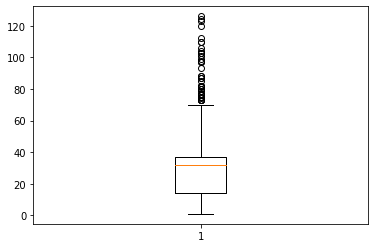

In [7]:
# 기업별 doc수 분포 확인 -boxplot -> 정규화가 필요해 보임
plt.boxplot(temp_df['doc_cnt'])

In [ ]:
predict=pd.read_excel("C:/Users/hanah/Desktop/workspace/Project/ESG/4. modelling/polarity_scoring/KoELECTRA/predict_koelectra.xlsx")

In [9]:
# 기업별 문서수의 영향력을 줄이기 위해 각 esg_score를 ln(기업 및 연도별 문서수)+1로 나눔 
import numpy as np
temp_df['esg_score2']=temp_df['esg_score']/(np.log(temp_df['doc_cnt'])+1)
temp_df

,id,year,ecnt,scnt,gcnt,predicted,tot_esg_cnt,e_score,s_score,g_score,esg_score,doc_cnt,esg_score2
0,1,2020,1,5,9,10,15,0.5,-0.071429,-1.428571,-1,16,-0.265070
1,1,2021,0,12,12,2,24,0.0,-2.000000,-1.000000,-3,16,-0.795210
2,2,2020,3,10,12,7,25,0.0,-0.750000,0.750000,0,25,0.000000
3,2,2021,0,4,10,9,14,0.0,-1.000000,3.000000,2,21,0.494496
4,3,2020,0,11,26,13,37,0.0,3.666667,7.333333,11,23,2.659900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,1380,2021,0,0,1,0,1,0.0,0.000000,-1.000000,-1,2,-0.590616
2552,1381,2020,0,1,3,3,4,0.0,0.500000,2.500000,3,3,1.429516
2553,1381,2021,0,3,2,0,5,0.0,0.166667,-0.166667,0,2,0.000000
2554,1382,2020,0,1,6,0,7,0.0,0.500000,-0.500000,0,4,0.000000


In [10]:
# Company_tb 에서 id 기준으로 회사이름 결합하기
cmp_tb=pd.read_excel('./company_tb_ver2.xlsx',index_col=0)
cmp_tb


,ID,CmpName,StockCode,Owner,BizNo,EstDate,Address,Industry,Product
0,1,블리츠웨이,369370,배성웅,6408701749,2020-10-20,서울특별시 영등포구 국회대로 638 블리츠웨이빌딩,제조업,기업 인수 및 합병
1,2,석경에이티,357550,임형섭,1348163122,2000-12-18,경기도 안산시 단원구 별망로459번길 24,제조업,바이오 및 전기전자 나노 소재
2,3,지놈앤컴퍼니,314130,"배지수, 박한수, 서영진 (각자 대표이사)",6278700257,2015-09-24,"경기도 성남시 분당구 판교로255번길 35, B동 8층(삼평동, 판교실리콘파크)",제조업,"마이크로바이옴 기반 치료제, 화장품, 건강기능식품"
3,4,프리시젼바이오,335810,김한신,3148608943,2009-09-28,대전시 유성구 테크노2로 306,제조업,체외진단 기기 및 시약
4,5,알체라,347860,황영규,6438700337,2016-06-03,경기도 성남시 분당구 판교로256번길 25 7층(삼평동),정보통신업,"얼굴인식 AI, 이상상황 감지 AI 등"
...,...,...,...,...,...,...,...,...,...
1377,1378,하이록코리아,13030,"문휴건, 문창환 각자대표이사",6038106103,1978-03-18,부산광역시 강서구 녹산산단27로 97,제조업,관이음쇠
1378,1379,SBI인베스트먼트,19550,공동대표이사 이준효 공동대표이사 소우에이이치로,1208164573,1986-11-24,서울특별시 강남구 테헤란로 509엔씨타워1 14층,금융 및 보험업,벤처캐피탈
1379,1380,리더스 기술투자,19570,김형준,1168116053,1986-11-27,서울특별시 강남구 테헤란로 447 KB우준타워 KB우준타워 17층,금융 및 보험업,금융투자
1380,1381,엠벤처투자,19590,홍성혁,1168115961,1986-12-02,서울특별시 강남구 테헤란로87길 36 도심공항타워 2503호,금융 및 보험업,벤처캐피탈


In [11]:
merge_df=pd.merge(temp_df,cmp_tb[['ID','CmpName']],left_on='id',right_on='ID',how='left')
merge_df

,id,year,ecnt,scnt,gcnt,predicted,tot_esg_cnt,e_score,s_score,g_score,esg_score,doc_cnt,esg_score2,ID,CmpName
0,1,2020,1,5,9,10,15,0.5,-0.071429,-1.428571,-1,16,-0.265070,1,블리츠웨이
1,1,2021,0,12,12,2,24,0.0,-2.000000,-1.000000,-3,16,-0.795210,1,블리츠웨이
2,2,2020,3,10,12,7,25,0.0,-0.750000,0.750000,0,25,0.000000,2,석경에이티
3,2,2021,0,4,10,9,14,0.0,-1.000000,3.000000,2,21,0.494496,2,석경에이티
4,3,2020,0,11,26,13,37,0.0,3.666667,7.333333,11,23,2.659900,3,지놈앤컴퍼니
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,1380,2021,0,0,1,0,1,0.0,0.000000,-1.000000,-1,2,-0.590616,1380,리더스 기술투자
2552,1381,2020,0,1,3,3,4,0.0,0.500000,2.500000,3,3,1.429516,1381,엠벤처투자
2553,1381,2021,0,3,2,0,5,0.0,0.166667,-0.166667,0,2,0.000000,1381,엠벤처투자
2554,1382,2020,0,1,6,0,7,0.0,0.500000,-0.500000,0,4,0.000000,1382,모헨즈


In [ ]:
merge_df.to_excel('./log_scoring_cmp_year_add_cmpname.xlsx')

(array([  3.,  28.,  42.,  92., 129., 188., 305., 352., 387., 351., 247.,
        162., 102.,  68.,  50.,  27.,  10.,  10.,   2.,   1.]),
 array([-6.03762368, -5.29513711, -4.55265055, -3.81016398, -3.06767742,
        -2.32519086, -1.58270429, -0.84021773, -0.09773116,  0.6447554 ,
         1.38724196,  2.12972853,  2.87221509,  3.61470166,  4.35718822,
         5.09967478,  5.84216135,  6.58464791,  7.32713448,  8.06962104,
         8.8121076 ]),
 <BarContainer object of 20 artists>)

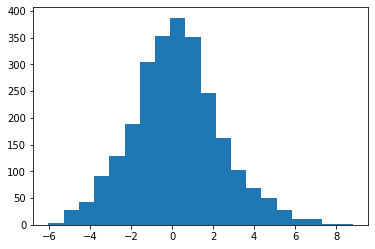

In [12]:
# esg_score2 분포확인
plt.hist(merge_df['esg_score2'], bins = 20)

(array([  3.,  30.,  57., 110., 184., 269., 486., 561., 327., 203., 123.,
         85.,  59.,  27.,  15.,   9.,   4.,   1.,   2.,   1.]),
 array([-28.  , -24.05, -20.1 , -16.15, -12.2 ,  -8.25,  -4.3 ,  -0.35,
          3.6 ,   7.55,  11.5 ,  15.45,  19.4 ,  23.35,  27.3 ,  31.25,
         35.2 ,  39.15,  43.1 ,  47.05,  51.  ]),
 <BarContainer object of 20 artists>)

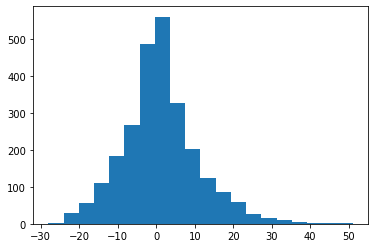

In [13]:
# 문서수 로그화하지않은 기존의  esg_score 분포확인
import matplotlib.pyplot as plt
plt.hist(sum_score['esg_score'], bins = 20)